<a href="https://colab.research.google.com/github/Shaan2522/NLP-Projects/blob/main/2_sms_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email classifier is an ML-based approach to classifiying the Spam and Ham messages.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path =  "/content/drive/MyDrive/Colab Notebooks/Datasets/sms_spam.csv"
#attempt to read the CSV file with different encodings
for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File successfully read with encoding: {encoding}")
    break #Mop the Loop if successful
  except UnicodeDecodeError:
    print(f"Failed to read with encoding {encoding}")
    continue #Try the next encing
  #
  # if the Loop completes without success, of will not be defined
if 'df' in locals():
  print("CSV file has been successfully loaded.")
else:
  print("All encoding attempts failed, Unable to read the CSV file.")

Failed to read with encoding utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

# **1. Data Cleaning**

In [6]:
# in unnamed 2,3,4 column almost all values are missing so we remove those three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# let's rename the column name for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# label should be in numeric format so let me apply labelencoder to convert it in numeric

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum(), df.shape

(0, (5169, 2))

# **2. EDA**

In [13]:
# we check no. of spams and hams in our data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

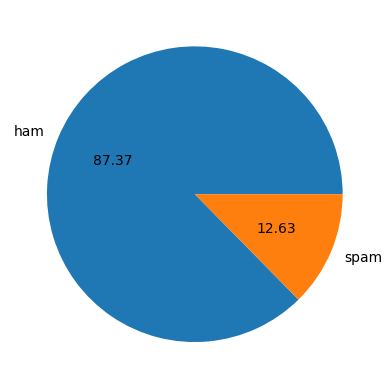

In [14]:
# data is imbalanced as we can see in pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
# let's calculate number of characters present in each row..
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# let's calculate number of words present in each row
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [19]:
# continued
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# let's calculate number of sentences present in each row
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [21]:
# continued
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# analysis of ham sms
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# analysis of spam sms
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

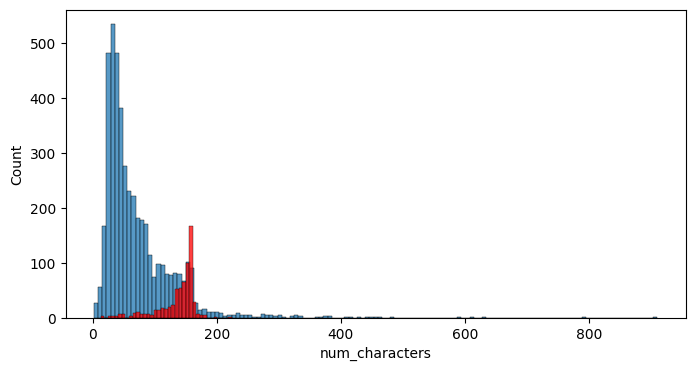

In [25]:
# plot histogram for no. of characters
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [26]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

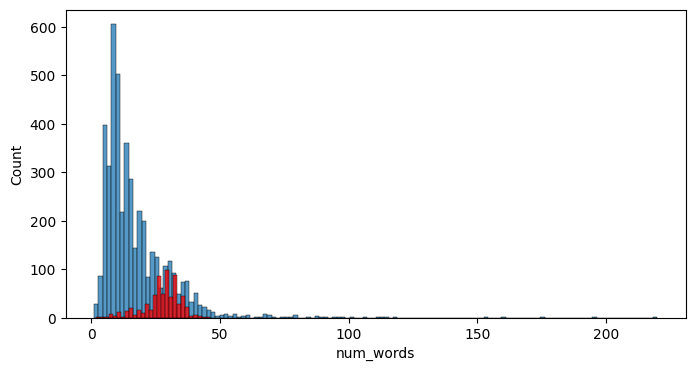

In [27]:
# plot histogram for no. of words
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

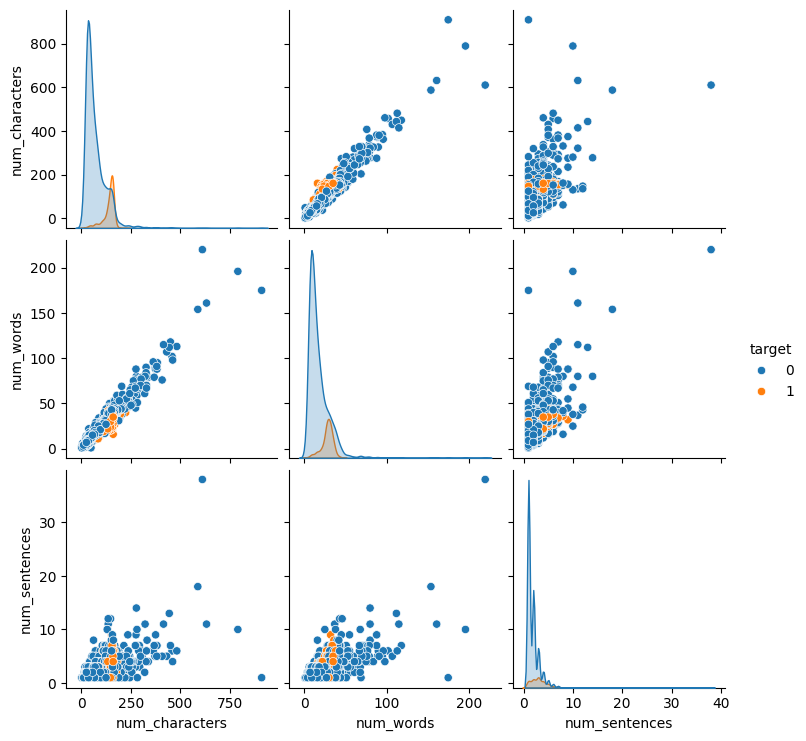

In [28]:
# relationship between columns
sns.pairplot(df,hue='target')

In [29]:
# since text column is not numeric so we take the rest
df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

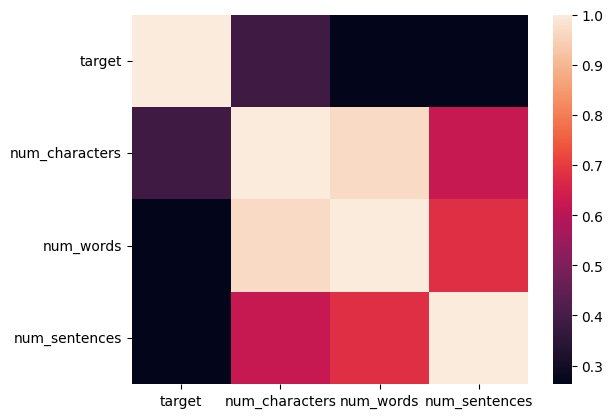

In [30]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr())

<Axes: >

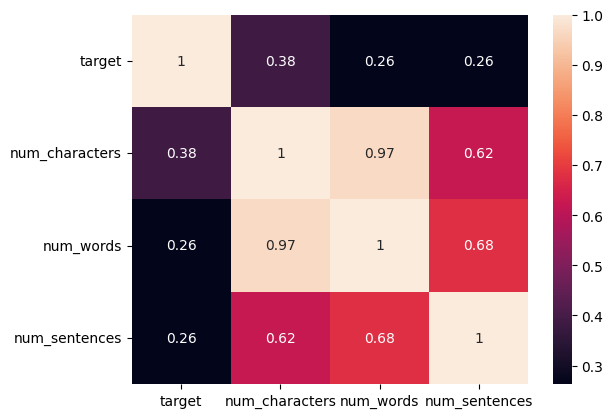

In [31]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

# **3. Data Pre-processing**

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing'), ps.stem('recommended') # examples of stemming

('danc', 'recommend')

In [36]:
# let's define a function that will be do all the above operation at a time
def text_transform(text):
    text = text.lower()  # lower case of all letters
    text = nltk.word_tokenize(text)   # split sentence into words

    y = []
    for i in text:
        if i.isalnum(): # removing all special characters
            y.append(i) # retaining only alphabets and numbers
    text = y[:]
    y.clear()

    for i in text: # removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i)) # stem all the words

    return " ".join(y)   # at last join all words in a string

In [37]:
# example of transformed text
text_transform('I loved Machine Learning YT lectures. How about you?')

'love machin learn yt lectur'

In [38]:
df['text'][133], text_transform(df['text'][133])  # test the function

('Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. å£1.50 SP:Tyrone',
 'sunshin quiz wkli q win top soni dvd player u know countri algarv txt ansr sp tyron')

In [39]:
df['text'].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [40]:
df['transformed_text'] = df['text'].apply(text_transform)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


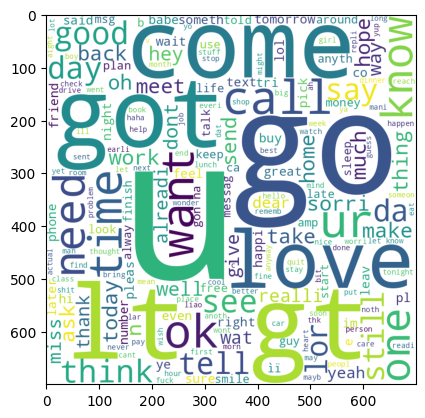

In [42]:
# word cloud for ham msgs
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

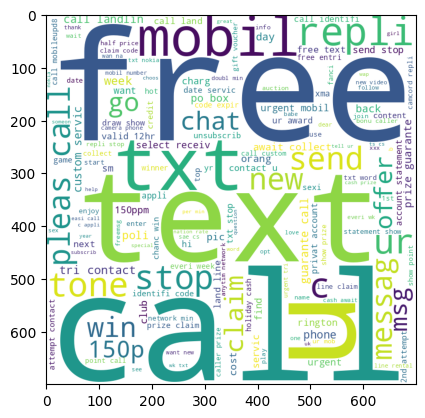

In [43]:
# word cloud for spam msgs
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [44]:
df[df['target'] == 1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [45]:
df[df['target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [46]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [47]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [50]:
len(spam_corpus)

9939

In [51]:
# count frequency of each word
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [52]:
# most common 30 words in spam msgs
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [53]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [54]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

(0        call
 1        free
 2           2
 3         txt
 4        text
 5           u
 6          ur
 7       mobil
 8        stop
 9       repli
 10      claim
 11          4
 12      prize
 13        get
 14        new
 15     servic
 16       tone
 17       send
 18     urgent
 19      nokia
 20    contact
 21      award
 22      phone
 23       cash
 24      pleas
 25       week
 26        win
 27          c
 28    collect
 29        min
 Name: 0, dtype: object,
 0     320
 1     191
 2     155
 3     141
 4     122
 5     119
 6     119
 7     114
 8     104
 9     103
 10     98
 11     97
 12     82
 13     74
 14     64
 15     64
 16     63
 17     60
 18     57
 19     57
 20     56
 21     55
 22     52
 23     51
 24     51
 25     49
 26     48
 27     45
 28     45
 29     45
 Name: 1, dtype: int64)

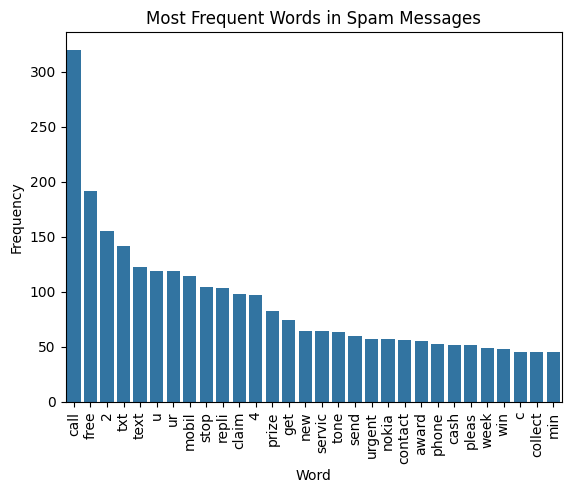

In [55]:
import matplotlib.pyplot as plt

# Get the 30 most common words and their frequencies for spam data
most_common_words = Counter(spam_corpus).most_common(30)

# Separate the words and their frequencies into two lists
words, frequencies = zip(*most_common_words)

# Create a bar plot with customizations
sns.barplot(x=list(words), y=list(frequencies))

plt.title("Most Frequent Words in Spam Messages")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

In [58]:
# count frequency of each word
from collections import Counter
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [59]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [60]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

(0         u
 1        go
 2       get
 3        gt
 4        lt
 5         2
 6      come
 7       got
 8      know
 9      like
 10     call
 11     time
 12       ok
 13     love
 14     good
 15     want
 16       ur
 17      day
 18     need
 19      one
 20      lor
 21        4
 22     home
 23    think
 24      see
 25     take
 26    still
 27       da
 28     tell
 29     make
 Name: 0, dtype: object,
 0     883
 1     404
 2     349
 3     288
 4     287
 5     284
 6     275
 7     236
 8     236
 9     234
 10    233
 11    219
 12    217
 13    216
 14    213
 15    208
 16    197
 17    190
 18    170
 19    165
 20    159
 21    156
 22    152
 23    149
 24    147
 25    143
 26    143
 27    142
 28    133
 29    129
 Name: 1, dtype: int64)

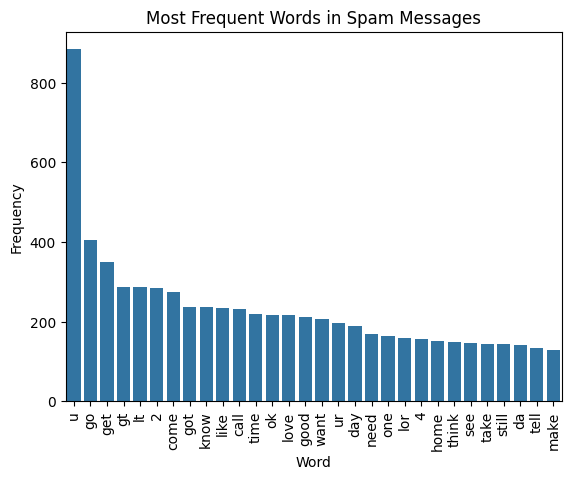

In [61]:
# Get the 30 most common words and their frequencies for ham data
most_common_words = Counter(ham_corpus).most_common(30)

# Separate the words and their frequencies into two lists
words, frequencies = zip(*most_common_words)

# Create a bar plot with customizations
sns.barplot(x=list(words), y=list(frequencies))

plt.title("Most Frequent Words in Spam Messages")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show()

# **4. Model Building**

In [62]:
# text vectorization using BoW technique
# first we do it using countvectorizer and then redo it using tfidf
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [63]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# since data is imbalanced so we check for precision score more than the accuracy

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred1))
print('Confusion matrix of the GaussianNB algorithm is\n',confusion_matrix(y_test,y_pred1))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred1))

Accuracy score of the GaussianNB algorithm is  0.8800773694390716
Confusion matrix of the GaussianNB algorithm is
 [[792 104]
 [ 20 118]]
Precision score of the GaussianNB algorithm is  0.5315315315315315


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score of the MultinomialNB algorithm is ',accuracy_score(y_test,y_pred2))
print('Confusion matrix of the MultinomialNB algorithm is\n',confusion_matrix(y_test,y_pred2))
print('Precision score of the MultinomialNB algorithm is ',precision_score(y_test,y_pred2))

Accuracy score of the MultinomialNB algorithm is  0.9642166344294004
Confusion matrix of the MultinomialNB algorithm is
 [[871  25]
 [ 12 126]]
Precision score of the MultinomialNB algorithm is  0.8344370860927153


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy score of the BernoulliNB algorithm is ',accuracy_score(y_test,y_pred3))
print('Confusion matrix of the BernoulliNB algorithm is\n',confusion_matrix(y_test,y_pred3))
print('Precision score of the BernoulliNB algorithm is ',precision_score(y_test,y_pred3))

Accuracy score of the BernoulliNB algorithm is  0.9700193423597679
Confusion matrix of the BernoulliNB algorithm is
 [[893   3]
 [ 28 110]]
Precision score of the BernoulliNB algorithm is  0.9734513274336283


In [72]:
# first run the entire model building code without any parameter
# then after that give a parameter to select only top 3000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [74]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# from sklearn.naive_bayes import *
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy score of the GaussianNB algorithm is ',accuracy_score(y_test,y_pred1))
print('Confusion matrix of the GaussianNB algorithm is\n',confusion_matrix(y_test,y_pred1))
print('Precision score of the GaussianNB algorithm is ',precision_score(y_test,y_pred1))

Accuracy score of the GaussianNB algorithm is  0.8607350096711799
Confusion matrix of the GaussianNB algorithm is
 [[769 120]
 [ 24 121]]
Precision score of the GaussianNB algorithm is  0.5020746887966805


In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy score of the MultinomialNB algorithm is ',accuracy_score(y_test,y_pred2))
print('Confusion matrix of the MultinomialNB algorithm is\n',confusion_matrix(y_test,y_pred2))
print('Precision score of the MultinomialNB algorithm is ',precision_score(y_test,y_pred2))

Accuracy score of the MultinomialNB algorithm is  0.9729206963249516
Confusion matrix of the MultinomialNB algorithm is
 [[888   1]
 [ 27 118]]
Precision score of the MultinomialNB algorithm is  0.9915966386554622


In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy score of the BernoulliNB algorithm is ',accuracy_score(y_test,y_pred3))
print('Confusion matrix of the BernoulliNB algorithm is\n',confusion_matrix(y_test,y_pred3))
print('Precision score of the BernoulliNB algorithm is ',precision_score(y_test,y_pred3))

Accuracy score of the BernoulliNB algorithm is  0.9729206963249516
Confusion matrix of the BernoulliNB algorithm is
 [[884   5]
 [ 23 122]]
Precision score of the BernoulliNB algorithm is  0.9606299212598425


**NOTE** - so now after all this we choose TFIDF -> MNB because of its high precision score

In [80]:
# now we explore more algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [84]:
train_classifier(svc, X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [86]:
# accuracy and precision score with max_features
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,KN,0.916828,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBDT,0.946809,0.968750
1,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.962282,0.884058
0,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


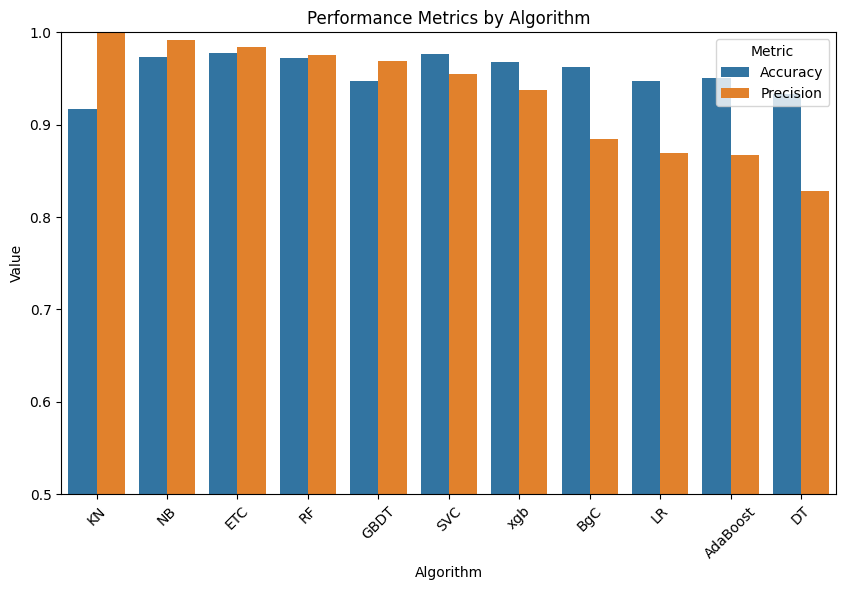

In [87]:
# Melt the DataFrame to long-form format for seaborn
melted_df = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'], var_name='Metric', value_name='Value')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=melted_df)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.title("Performance Metrics by Algorithm")
plt.xlabel("Algorithm")
plt.ylabel("Value")

# Display the plot
plt.show()